# Demo 1: Basic usage
This notebook contains a demonstration of a common usage of h-NNE to project data to two dimensions. The data is plotted with both the target labels and labels from the h-NNE hierarchy. As a dataset we selected the train and test splits of CIFAR-10. In the end we also perform a projection of the test data using the h-NNE structure built on the train data.

In [11]:
import matplotlib.pyplot as plt
from torchvision.datasets import CIFAR10

from hnne import HNNE

## CIFAR-10 train
50000 examples of 32x32 RGB images

### Download and load the data

In [12]:
cifar10_train = CIFAR10(root='..', download=True, train=True)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 170498071/170498071 [02:19<00:00, 1224685.89it/s]


Extracting ../cifar-10-python.tar.gz to ..


In [3]:
data = cifar10_train.data.reshape((len(cifar10_train.data), -1))
targets = cifar10_train.targets
data.shape

(50000, 3072)

In [4]:
%%time
hnne = HNNE(hnne_version="v1")
projection = hnne.fit_transform(data)

CPU times: user 1min 51s, sys: 21.7 s, total: 2min 13s
Wall time: 18.7 s


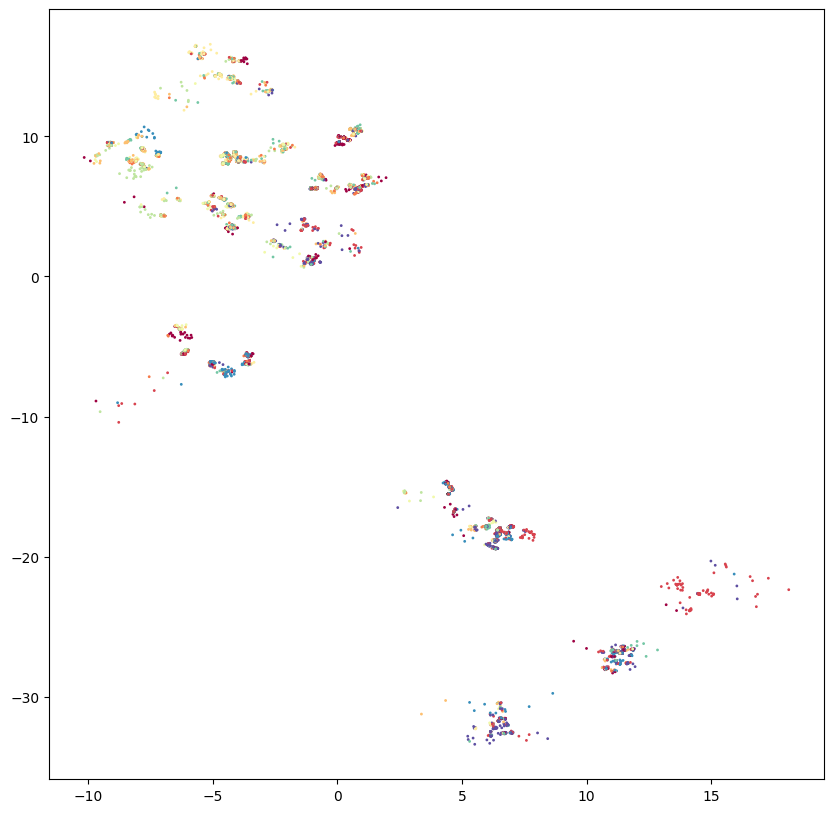

In [5]:
plt.figure(figsize=(10, 10))
plt.scatter(*projection.T, s=1, c=targets, cmap='Spectral')
plt.show()

## Visualize with colors based on partitions defined from the h-NNE hierarchy levels
h-NNE is inspired by the FINCH clustering and has the nice property that during the construction of the hierarchy which defines the projection, multiple partitions of the data are formed, from very grobe to more granular. Those partitions can be used to get produce some clusters on the data and are particularly useful in cases where no labels are available.

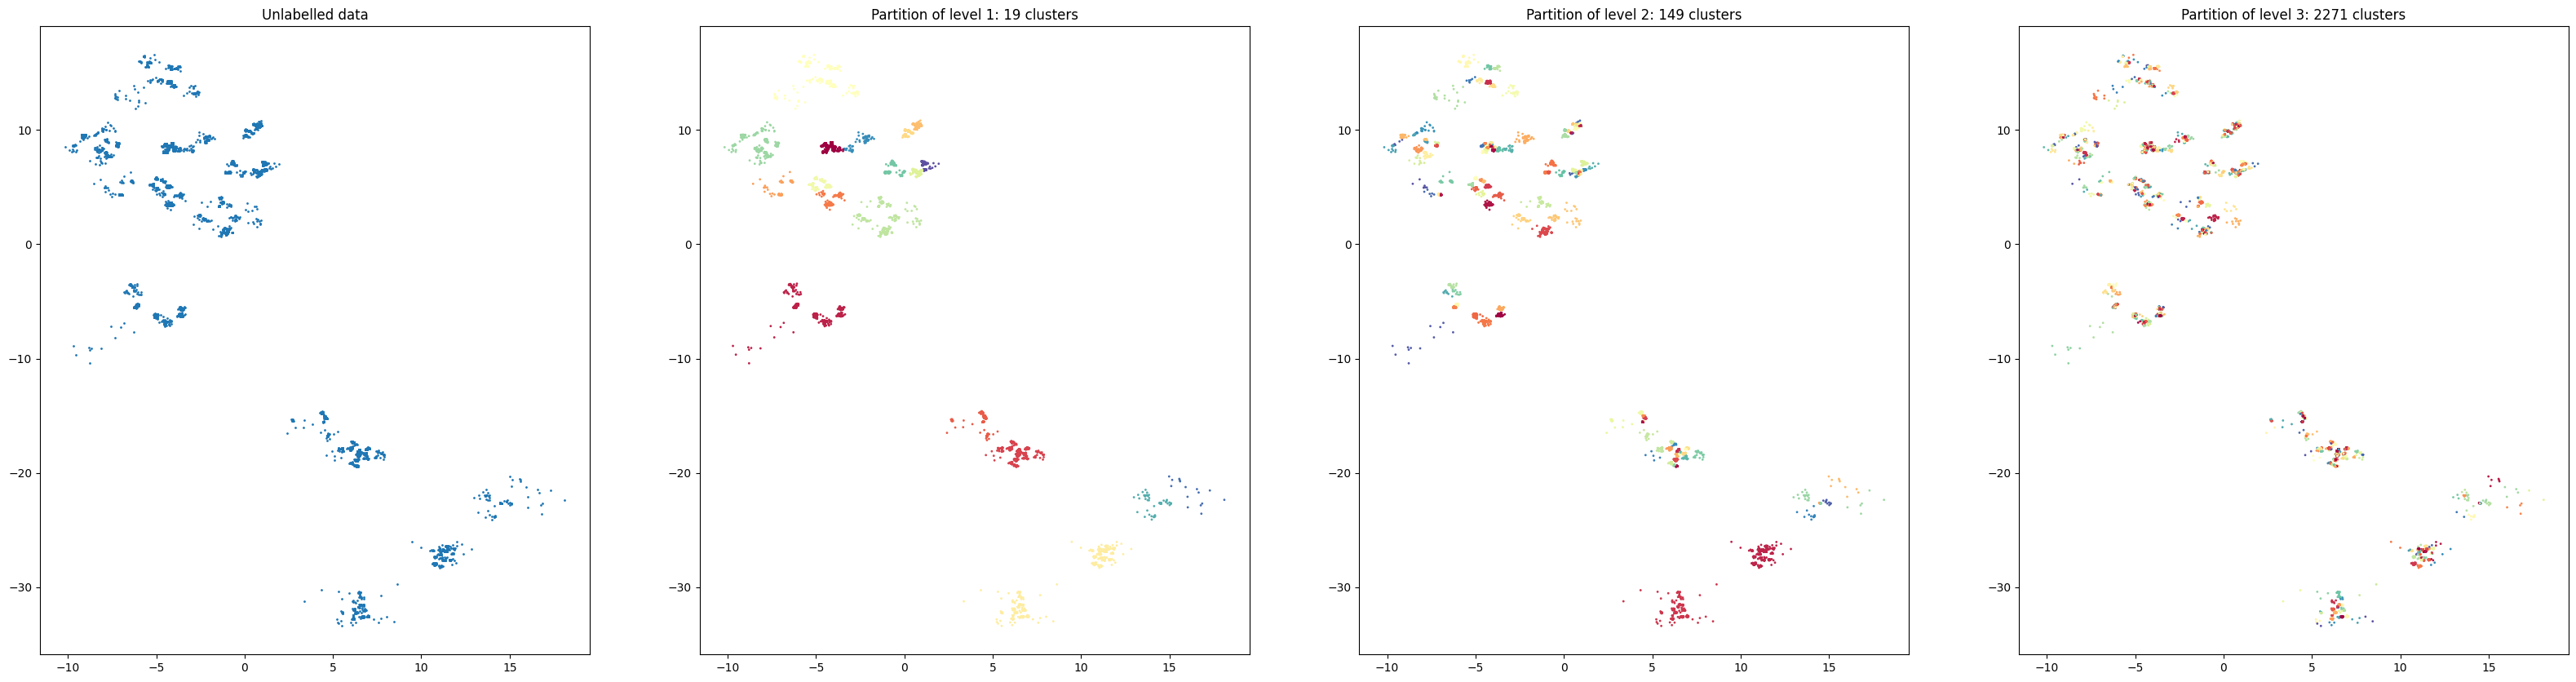

In [6]:
partitions = hnne.hierarchy_parameters.partitions
partition_sizes = hnne.hierarchy_parameters.partition_sizes
number_of_levels = min(partitions.shape[1], 3)

_, ax = plt.subplots(1, number_of_levels + 1, figsize=(10*(number_of_levels + 1), 10))

ax[0].set_title('Unlabelled data')
ax[0].scatter(*projection.T, s=1)

for i in list(range(1, number_of_levels + 1)):
    partition_idx = number_of_levels - i
    ax[i].set_title(f'Partition of level {i}: {partition_sizes[partition_idx]} clusters')
    ax[i].scatter(*projection.T, s=1, c=partitions[:, partition_idx], cmap='Spectral')
plt.show()

## Project new points
Using the projection generated from the CIFAR-10 training set, we project the CIFAR-10 testing set

In [7]:
cifar10_test = CIFAR10(root='..', download=True, train=False)

Files already downloaded and verified


In [8]:
data_test = cifar10_test.data.reshape((len(cifar10_test.data), -1))
targets_test = cifar10_test.targets
data_test.shape

(10000, 3072)

In [9]:
%%time
new_data_projection = hnne.transform(data_test)

CPU times: user 4.76 s, sys: 3.38 s, total: 8.15 s
Wall time: 429 ms


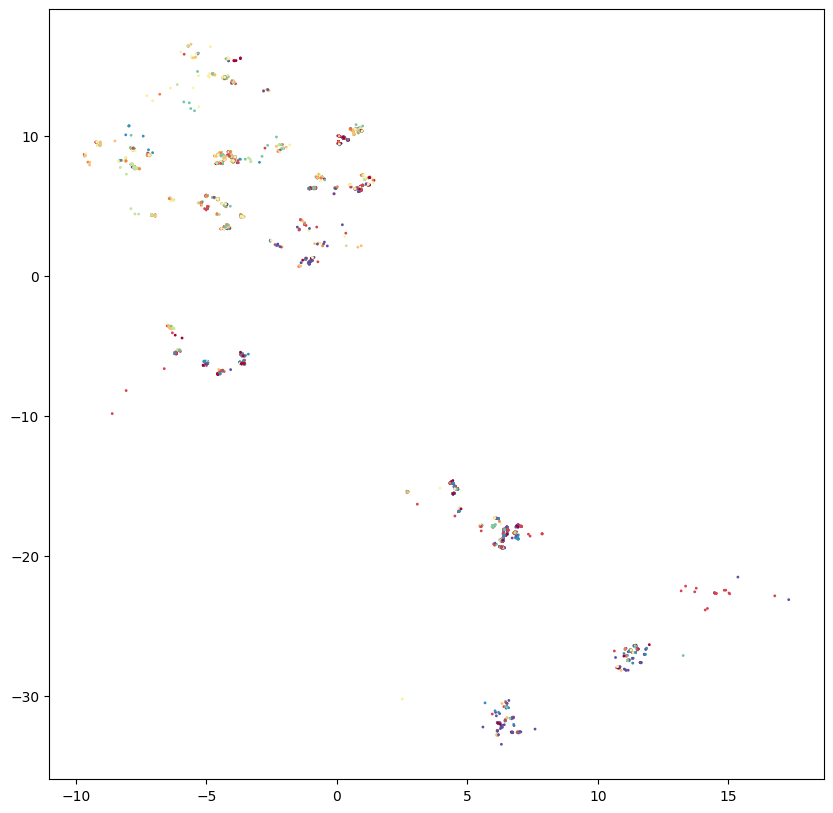

In [10]:
plt.figure(figsize=(10, 10))
plt.scatter(*new_data_projection.T, s=1, c=targets_test, cmap='Spectral')
plt.show()